In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DEBUG:matplotlib:matplotlib data path: /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/kseniamasnikova/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib._abc', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'importlib.machinery', 'mpl_toolkits', 'site', 'runpy

In [16]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='

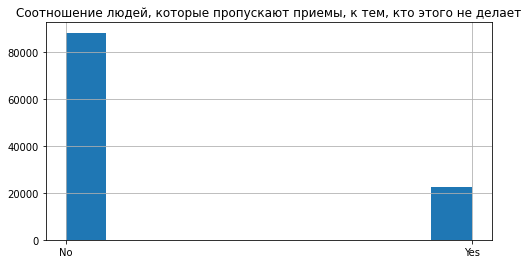

In [17]:
# Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [18]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [19]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [20]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

# Логирование

In [9]:
import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

DEBUG:root:Это сообщение отладки
INFO:root:Это информационное сообщение
ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


In [6]:
import logging

In [10]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

DEBUG:root:Сообщение будет залогировано!


In [11]:
# УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ
logging.FileHandler('log_file.log')

<FileHandler /Users/kseniamasnikova/IDE/SkillFactory/EDA/EDA-6/log_file.log (NOTSET)>

In [12]:
# УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ
logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", level=logging.debug)
logging.info('Проверка')

INFO:root:Проверка


In [13]:
# Создадим функцию log() для генерации лог-файла и записи в него информации.
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [21]:
# Создадим лог-файл и запишем туда информацию о датасете.
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO:root:Data
INFO:root:Data shape (110527, 14)
INFO:root:Percentage of women: 0.653882342398853
INFO:root:Percentage of men: 0.346117657601147


In [22]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


# COMET

In [23]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="bsB4z2WZsKCdQi5bOAjoK6LBT",
    project_name="general",
    workspace="kseniya-masnikova",
)

# Run your code and go to /

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
DEBUG:everett:No INI file found: []
DEBUG:everett:No INI file found: ['./.comet.config']
DEBUG:everett:No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG:everett:No INI file found: ['~/.comet.config']
DEBUG:everett:Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: []
DEBUG:everett:No INI file found: ['./.comet.config']
DEBUG:everett:No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG:everett:No INI file 

In [24]:
experiment.end()

DEBUG:urllib3.util.retry:Incremented Retry for (url='/api/rest/v2/experiment/metadata?experimentKey=1302f872e2af44e7bfb0ee5d9752feca'): Retry(total=2, connect=None, read=None, redirect=None, status=None)
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (2): www.comet.com:443
DEBUG:urllib3.connectionpool:https://www.comet.com:443 "GET /api/rest/v2/experiment/metadata?experimentKey=1302f872e2af44e7bfb0ee5d9752feca HTTP/1.1" 200 264
